 ### 0001. Two Sum (Brute Force Approach)
 

| **Author** | **Last Updated** | **Difficulty** | **Tags** |
| :--- | :--- | :--- | :--- |
| MD Saifullah Baig.A | 01.01.2026 | Easy | Array, Hash Table |

**Problem Link:** [LeetCode 0001](https://leetcode.com/problems/two-sum/)

---

## 1. Problem Statement
Given an array of integers `nums` and an integer `target`, return indices of the two numbers such that they add up to `target`.
* You may assume that each input would have **exactly one solution**.
* You may not use the same element twice.

**Example:**
```text
Input: nums = [2,7,11,15], target = 9
Output: [0,1]
Explanation: Because nums[0] + nums[1] == 9, we return [0, 1].

## Approach: One-Pass Hash Map
This is the most efficient approach. Instead of scanning the entire array for every number (like Brute Force), we use a **Hash Map** (Dictionary in Python) to "remember" the numbers we have seen so far.

**Logic:**
1. Initialize an empty hash map `prev_map` to store values in the format `{value: index}`.
2. Iterate through the array `nums` using `enumerate` (to get both index `i` and value `n`).
3. Calculate the **difference** needed to reach the target: `diff = target - n`.
4. **Check:** Is `diff` already in `prev_map`?
   - **Yes:** We found the pair! Return `[prev_map[diff], i]`.
   - **No:** Store the current number in the map: `prev_map[n] = i`.
5. This allows us to find the solution in a single pass through the array.

## Complexity Analysis
* **Time Complexity:** $O(N)$
  - We traverse the list containing $N$ elements exactly once.
  - Hash map lookups and insertions take $O(1)$ time on average.
* **Space Complexity:** $O(N)$
  - In the worst case, we might store almost every element in the hash map before finding the pair.

## Why is this the "Best" Solution?
| Approach | Time | Space | Verdict |
| :--- | :--- | :--- | :--- |
| Brute Force | $O(N^2)$ | $O(1)$ | Too slow. |
| Sorting | $O(N \log N)$ | $O(N)$ | Good, but complex index tracking. |
| **One-Pass Hash Map** | **$O(N)$** | **$O(N)$** | **Optimal speed. The standard interview answer.** |

## Edge Case Checklist
* [ ] **First two elements sum to target:** e.g., `[2, 7, ...], target=9`. (Returns immediately).
* [ ] **Duplicates:** `[3, 3], target=6`. (The first `3` is stored, the second `3` finds it).
* [ ] **Negative numbers:** `[-5, -2, ...], target=-7`. (Math works correctly).

In [24]:
class Solution:
    def twoSum(self, nums: List[int], target: int) -> List[int]:
        hash={}
        for idx,num in enumerate(nums):
            complement=target-num
            if complement in hash:
                return [hash[target-num],idx]
            hash[num]=idx
        return []

In [25]:
answer=Solution()
nums=[2,7,11,15]
target=9
print(answer.twoSum(nums,target))

[0, 1]


### Other approaches

In [26]:
def brute(self, nums: List[int], target: int) -> List[int]:
    for i in range(len(nums)):
        for j in range(i,len(nums)):
            if target==nums[i]+nums[j]:
                return i,j
Solution.brute=brute

In [27]:
def sorting(self, nums: List[int], target: int) -> List[int]:
    nums_sorted=[(value,idx) for idx,value in enumerate(nums)]
    nums_sorted.sort()
    left,right=0,len(nums)-1
    while (left<right):
        sum=nums_sorted[left][0]+nums_sorted[right][0]
        if sum==target:
            return nums_sorted[left][1],nums_sorted[right][1]
        elif sum>target:
            right-=1
        elif sum<target:
            left+=1
    return []
Solution.sorting=sorting

# Performance Visualization
**Goal**: Visually demonstrate the efficiency difference between $O(N^2)$, $O(N \log N)$, and $O(N)$ using Matplotlib.

### 1. The Scaling Problem 
When we compare all three algorithms together, the Brute Force approach ($O(N^2)$) is so slow that it distorts the graph.
* **Brute Force (Red):** Shoots up vertically.
* **Sorting & Hash Map:** Look like flat lines (indistinguishable) because the scale is set by the slow algorithm(Brute Force).

### 2. The "Battle of the Best" (Zoomed In)
To see the real difference between **Sorting** ($O(N \log N)$) and **Hash Map** ($O(N)$), we must:
1. **Remove** the Brute Force dataset.
2. **Increase** the input size ($N$) to 1,000,000 elements.

Running benchmark for 3 approaches...
      N  Brute Force   Sorting  Hash Map
0   100     0.000829  0.000133  0.000078
1   500     0.010365  0.034681  0.000090
2  1000     0.066747  0.000469  0.000570
3  2000     0.099227  0.025335  0.000312
4  3000     0.205084  0.013957  0.000460
5  5000     0.586947  0.184985  0.001674


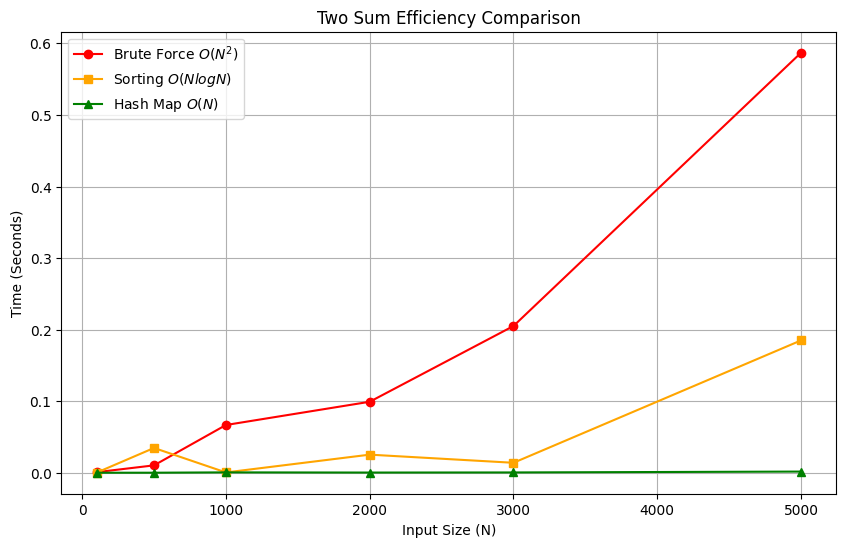

In [28]:
import time
import random
import pandas as pd
import matplotlib.pyplot as plt
def run_benchmark():
    # Input sizes to test
    input_sizes = [100, 500, 1000, 2000, 3000, 5000]
    results = []
    print("Running benchmark for 3 approaches...")
    for n in input_sizes:
        nums = [random.randint(1, 100000) for _ in range(n)]
        target = -1 #Impossible target -> Forces Worst Case for all
        # Measure Brute Force
        start = time.time()
        answer.brute(nums, target)
        t_brute = time.time() - start
        # Measure Sorting
        start = time.time()
        answer.sorting(nums, target)
        t_sort = time.time() - start
        # Measure Hash Map
        start = time.time()
        answer.twoSum(nums, target)
        t_hash = time.time() - start
        results.append({
            "N": n,
            "Brute Force": t_brute,
            "Sorting": t_sort,
            "Hash Map": t_hash
        })
    df = pd.DataFrame(results)
    print(df)
    plt.figure(figsize=(10, 6))
    plt.plot(df["N"], df["Brute Force"], label='Brute Force $O(N^2)$', marker='o', color='red')
    plt.plot(df["N"], df["Sorting"], label='Sorting $O(N log N)$', marker='s', color='orange')
    plt.plot(df["N"], df["Hash Map"], label='Hash Map $O(N)$', marker='^', color='green')
    plt.title('Two Sum Efficiency Comparison')
    plt.xlabel('Input Size (N)')
    plt.ylabel('Time (Seconds)')
    plt.legend()
    plt.grid(True)
    plt.show()
if __name__ == "__main__":
    run_benchmark()